In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project

/content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project


In [3]:
# cd /content/drive/MyDrive/Project_Folder

### tesseract 설치

In [4]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 0s (27.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fron

In [5]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
%pwd

'/content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project'

### img read

In [7]:
import pytesseract
import cv2
import os
from PIL import Image
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import requests
from imutils.perspective import four_point_transform
import imutils

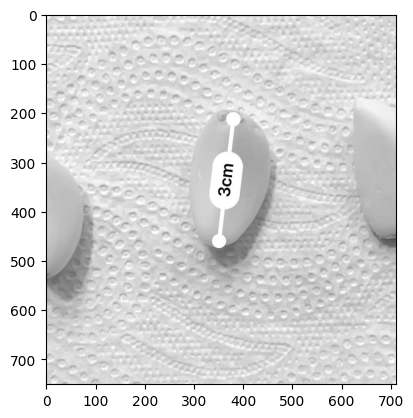

In [8]:
#imread
image_org = cv2.imread('length/3cm/garlic_3cm_1.jpg')
gray = cv2.cvtColor(image_org, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

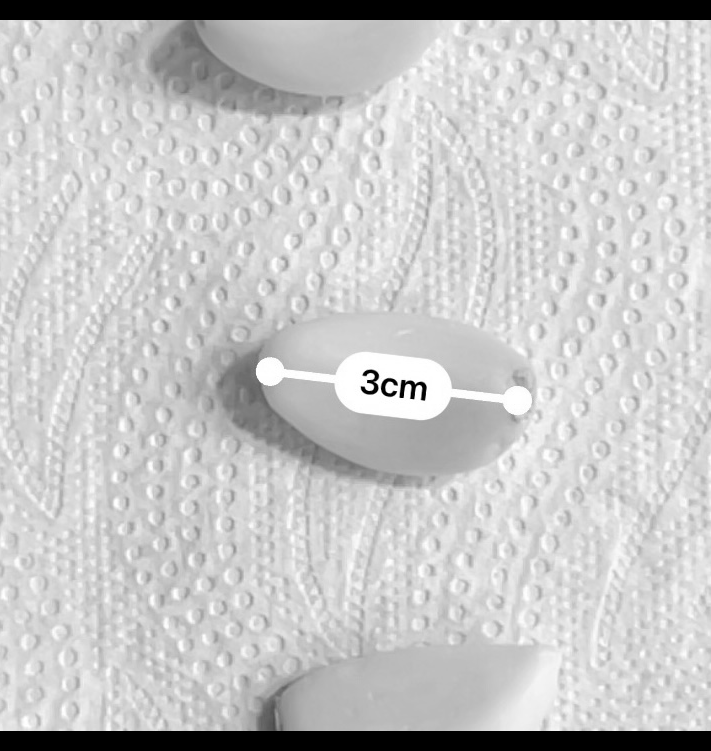

3cm


In [27]:
#image rotation
(h,w) = gray.shape[:2]
center = (w//2, h//2)

M = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated = cv2.warpAffine(gray, M, (w,h))
cv2_imshow(rotated)

# options = "--psm 6"
text = pytesseract.image_to_string(rotated) # , config=options
arr = text.split('\n')[0:-1]
text = '\n'.join(arr)
print(text)

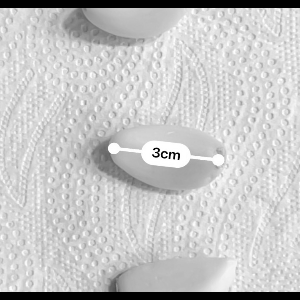

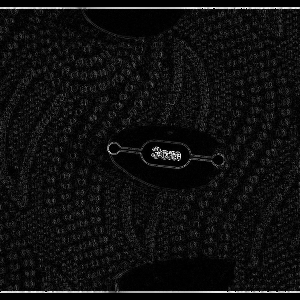

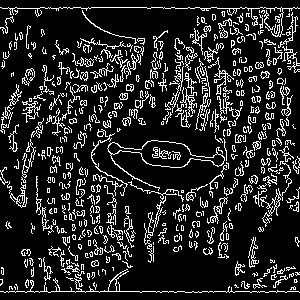

In [10]:
image = rotated.copy()

image = cv2.resize(image,(300,300))

#Gaussian blurred
gaus_ing = cv2.GaussianBlur(image, (5,5),0.3)
cv2_imshow(gaus_ing)

lap = cv2.Laplacian(gaus_ing, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
cv2_imshow(lap)

#edged
edged = cv2.Canny(gaus_ing, 75, 200)
cv2_imshow(edged)

ty er i : a =.
9 J ; ey ke — -
Ay ae . 5
4 poae i > ot
B wee ian ~,
a oT es ~ F \
; ae \
ih gy }
ay
lie ie)
f ]
ey 4
5 y a
yee 7 é
F
, ) ‘ are
Ben ;
F.
sal ie
“© 1 Oe
o aed it
de © Sead :
f, ae AP)
44 ffs peg 4 Hy
oe Le She re
se Sek ae ee H “
ON Gs a a an Lif
OO aed “
ST eee oe
ee eT) eee Mid y Oe


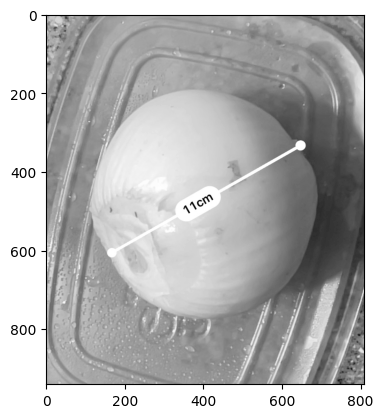

In [26]:
# chilipepper

#imread
image_ch = cv2.imread('length/11cm/onion_11cm.jpg')
gray_ch = cv2.cvtColor(image_ch, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_ch, cmap='gray')

#text
options = "--psm 6"
text = pytesseract.image_to_string(gray_ch, config=options) # , config=options
arr = text.split('\n')[0:-1]
text = '\n'.join(arr)
print(text)

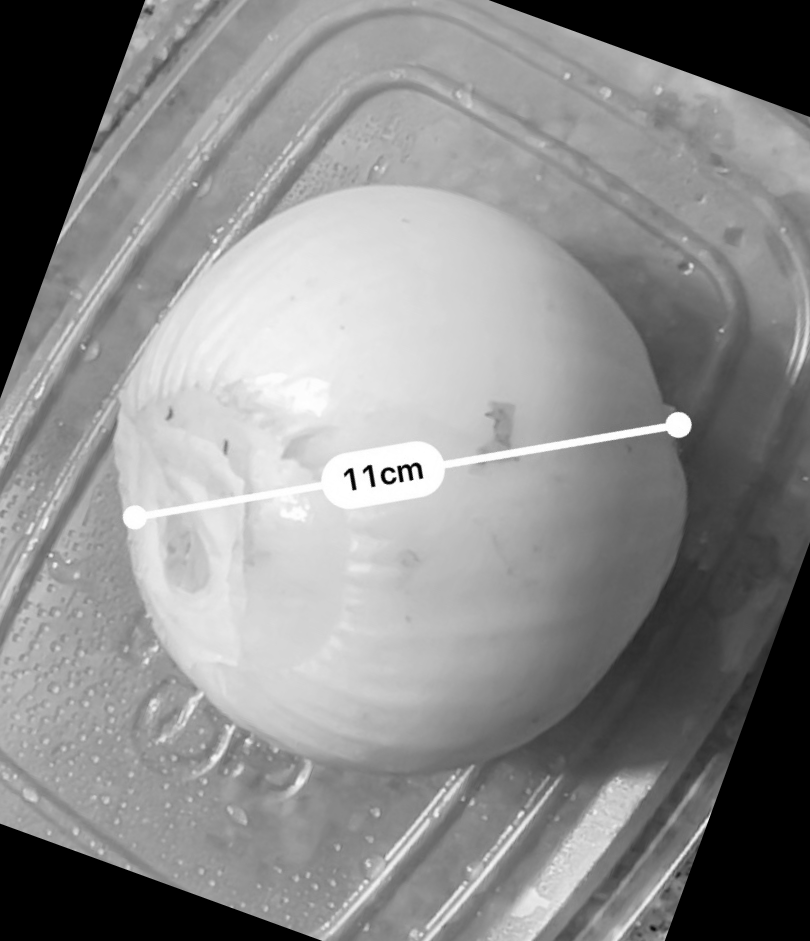

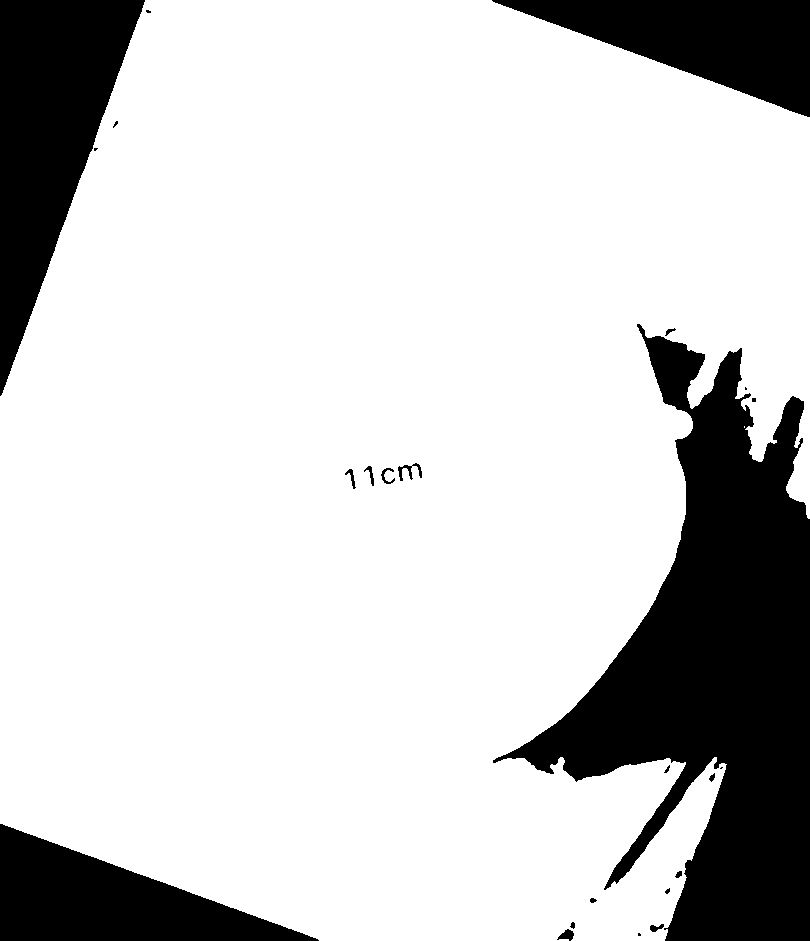

 

41cm

  


In [25]:
#image rotation
(h,w) = gray_ch.shape[:2]
center_ch = (w//2, h//2)

M = cv2.getRotationMatrix2D(center_ch, -20, 1.0)
rotated = cv2.warpAffine(gray_ch, M, (w,h))
cv2_imshow(rotated)

# thresholding
blurred = cv2.GaussianBlur(rotated, (5,5),0)

(T, thresh) = cv2.threshold(blurred, 85, 255, cv2.THRESH_BINARY) #80
cv2_imshow(thresh)

#text
# options = "--psm 6"
text = pytesseract.image_to_string(thresh, config=options) # , config=options
arr = text.split('\n')[0:-1]
text = '\n'.join(arr)
print(text)

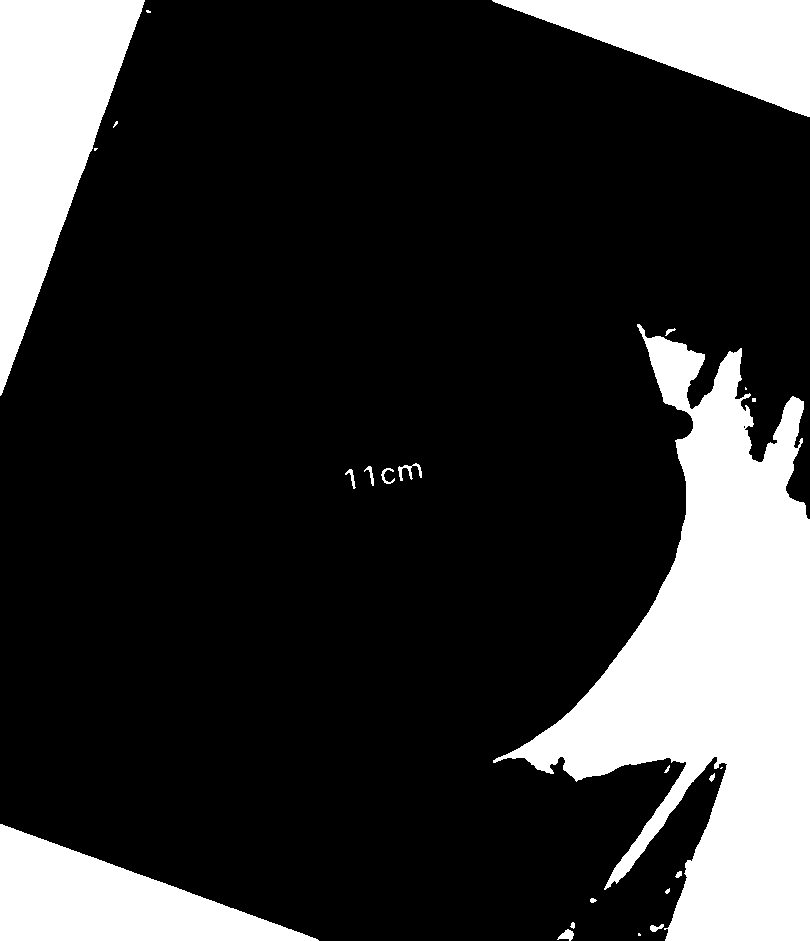

 

Cmraall

  


In [24]:
(T, thresh) = cv2.threshold(blurred, 85, 255, cv2.THRESH_BINARY_INV) #80
cv2_imshow(thresh)

#text
# options = "--psm 6"
text = pytesseract.image_to_string(thresh, config=options) # , config=options
arr = text.split('\n')[0:-1]
text = '\n'.join(arr)
print(text)

tesseract_2
https://yunwoong.tistory.com/72?category=902345

이미지 배경 제거

In [14]:
# 이미지 배경 제거

In [15]:
!pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 103.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [16]:
from rembg import remove

100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 54.3GB/s]


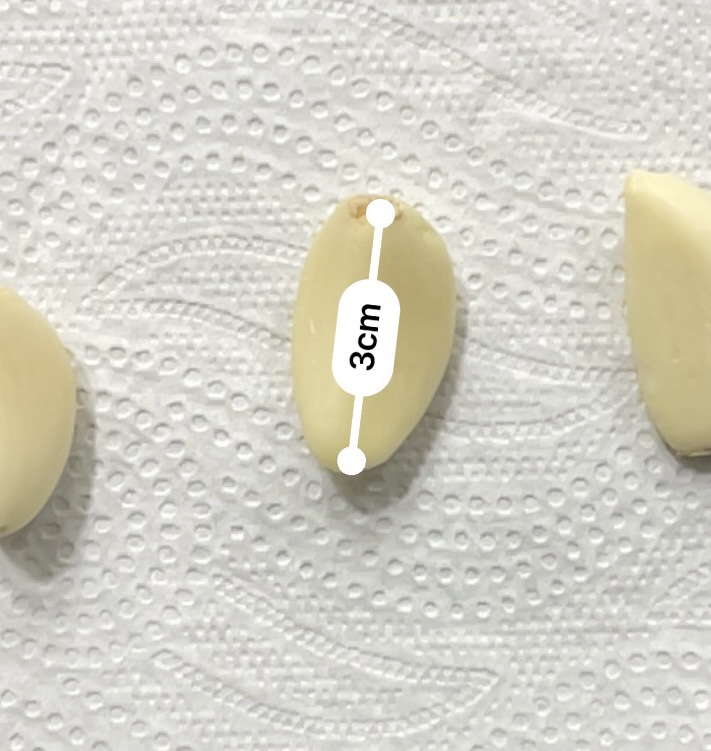

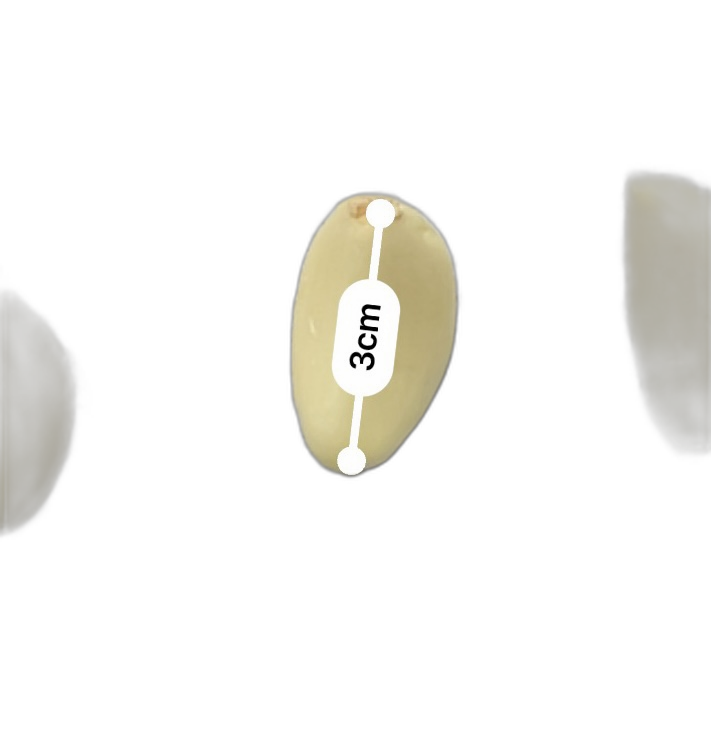

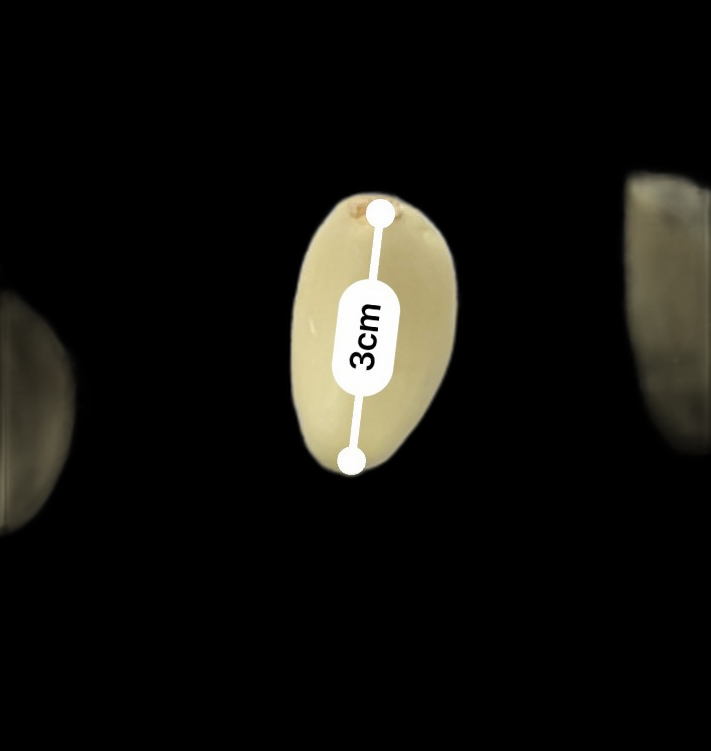

(751, 711, 3) (751, 711, 4) (751, 711, 3)


In [17]:
out = remove(image_org)
cv2_imshow(image_org)
cv2_imshow(out)
rgb_image = out[:,:,:3]
cv2_imshow(rgb_image)

print(image_org.shape, out.shape, rgb_image.shape)

[[[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 ...

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]]


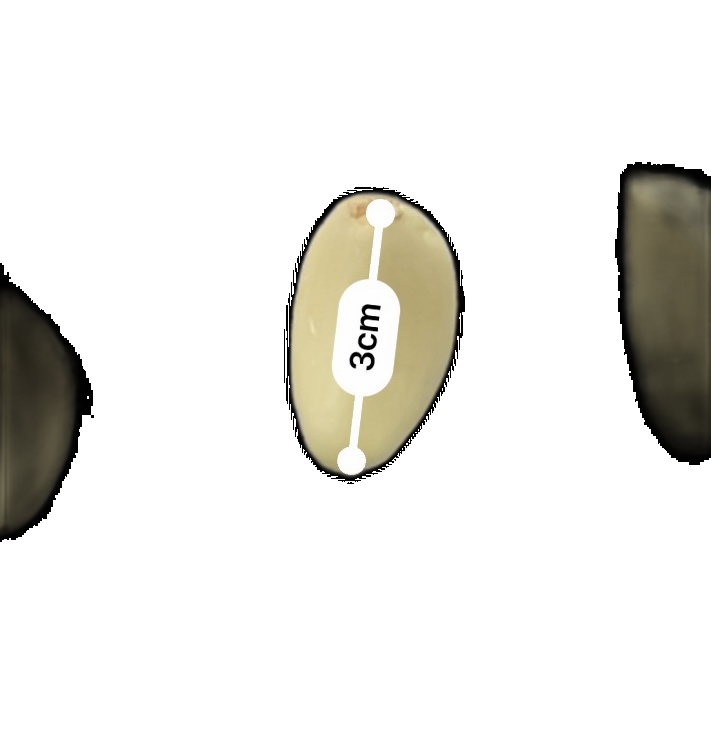

In [18]:
for row in out:
  for col in row:
    if col[3] == 0:
      col[0]=255
      col[1]=255
      col[2]=255
print(out)

rgb_image = out[:,:,:3]
cv2_imshow(rgb_image)


이미지 aplah 0 -> rgb[255, 255, 255]

In [20]:
alpha_mask = (rgba_image[:, :, :3] == 0)
rgb_image[alpha_mask] = [255, 255, 255]

NameError: ignored

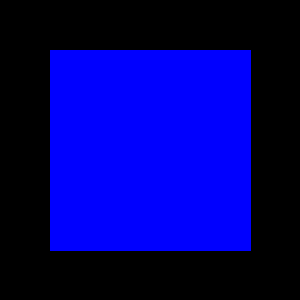

(300, 300, 3)

In [21]:
img = np.zeros((300, 300, 3), dtype=np.uint8)
cv2.rectangle(img, (50, 50), (250, 250), color=(255, 0, 0), thickness=-1)
cv2_imshow(img)
img.shape

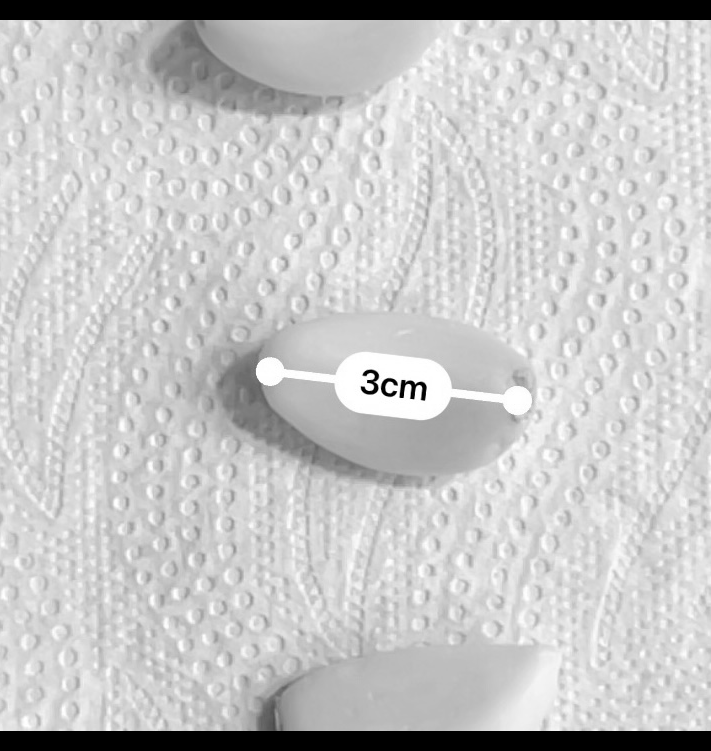

3cm
A



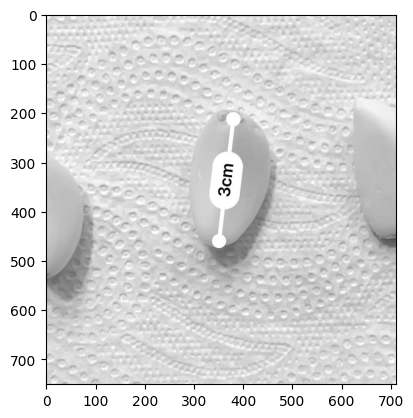

In [22]:
# image - rgba
gray1 = cv2.cvtColor(out, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

#image rotation
(h,w) = gray.shape[:2]
center = (w//2, h//2)

M = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated = cv2.warpAffine(gray, M, (w,h))
cv2_imshow(rotated)

# text
options = "--psm 4"
text = pytesseract.image_to_string(rotated, config=options)

print(text)

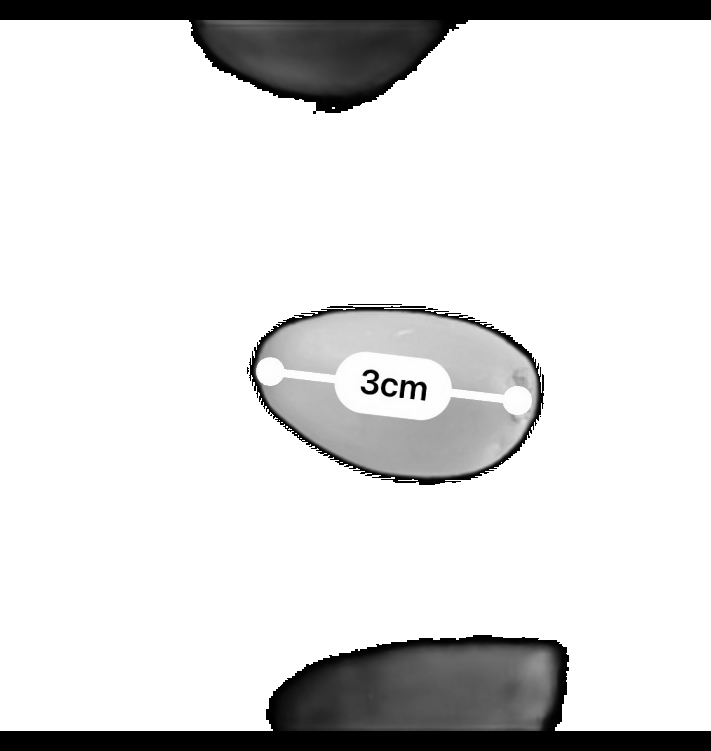

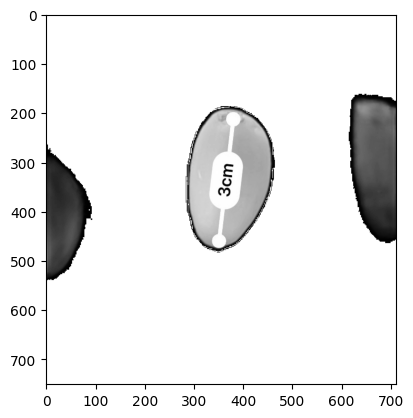

In [23]:
# image - rgb
gray2 = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray2, cmap='gray')

#image rotation
(h,w) = gray2.shape[:2]
center = (w//2, h//2)

M = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated2 = cv2.warpAffine(gray2, M, (w,h))
cv2_imshow(rotated2)

# text
options2 = "--psm 4"
text2 = pytesseract.image_to_string(rotated2, config=options2)

print(text2)